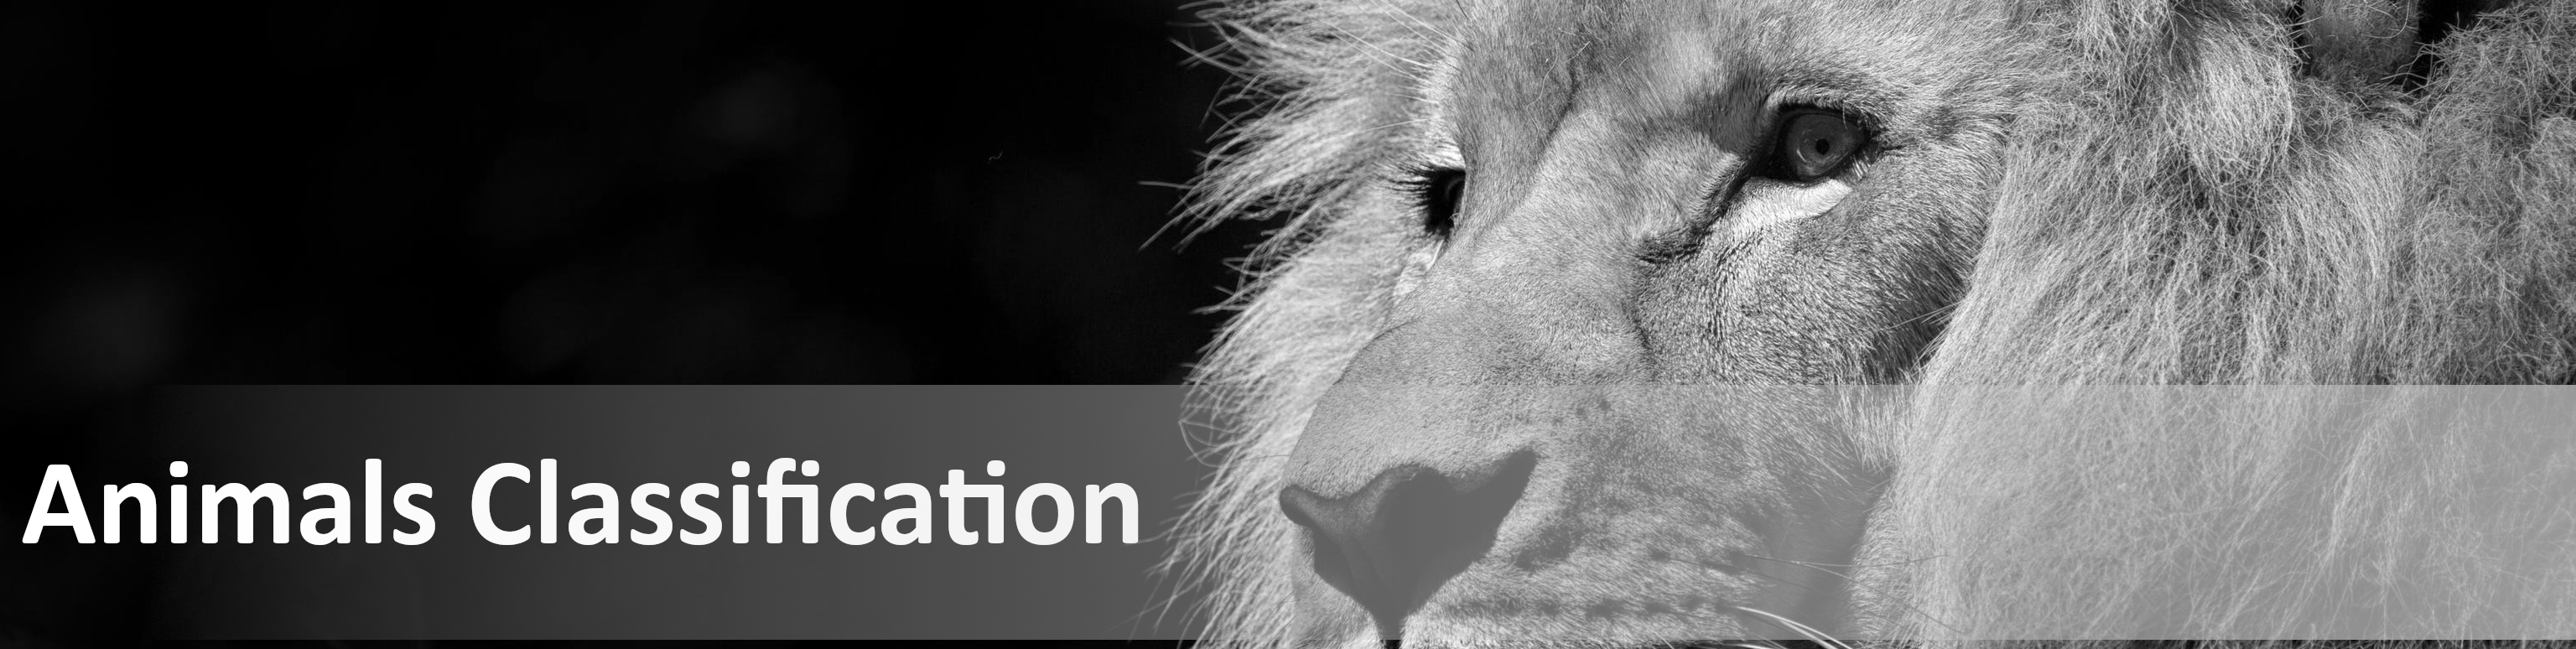

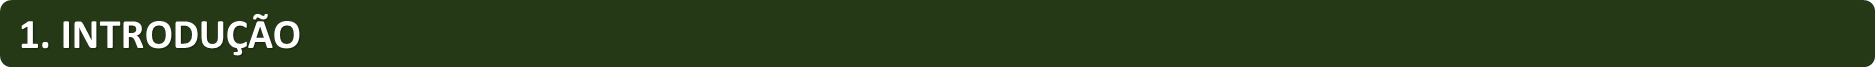

Dataset disponível na [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Zoo) utilizado para aplicação de algoritmos de classificação. O Dataset é composto por 101 registros, cada registro com a descrição de um animal, caracterizados pela distribuição de 16 colunas. Há 7 classes de animais disponíveis: Mamíferos, Passáros, Répteis, Peixes, Anfíbios, Insetos e Invertebrados.

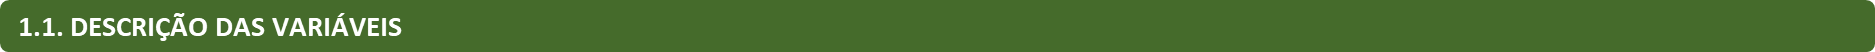

|       **Variável**      |                       **Descrição**                    |
|-------------------------|:------------------------------------------------------:|
|    **animal_name**      |      Nome do animal|
|    **hair**             |      Variável Booleana                   |
|    **feathers**         |      Variável Booleana         |
|    **eggs**             |      Variável Booleana                                    |
|    **milk**             |      Variável Booleana                        |
|    **airbone**          |      Variável Booleana|
|    **aquatic predator** |      Variável Booleana|
|    **toothed	backbone**|      Variável Booleana                    |
|    **breathes**         |      Variável Booleana                               |
|    **venomous**         |      Variável Booleana                          |
|    **legs**             |      Variável Booleana                                     |
|    **tail**             |      Variável Booleana |
|    **domestic**         |      Variável Booleana                        |
|    **catsize**          |      Variável Booleana               |
|    **class_type**       |      Variável Target, indica a classe a qual o animal pertence               |

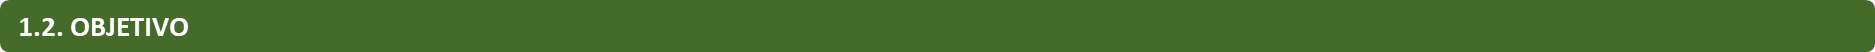
     

Verificar qual algoritmo obtém o melhor desempenho na previsão da classe dos animais, baseado nas características descritas nas variáveis acima.

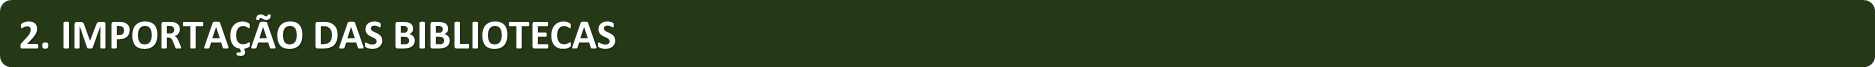

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import networkx as nx
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

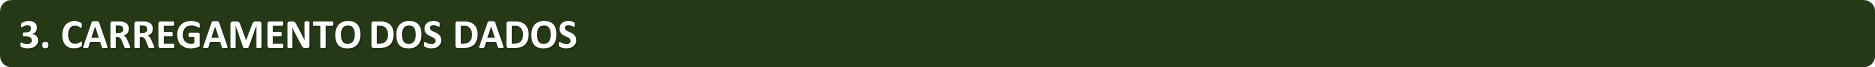

In [2]:
df = pd.read_csv('Arquivos/zoo.csv')

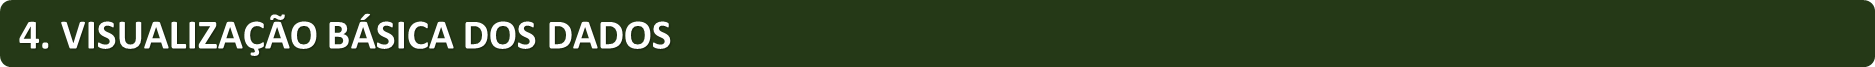

In [3]:
df.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [4]:
print(f'O Dataset é composto por \033[1m{df.shape[0]} registros\033[0m com \033[1m{df.shape[1]} atributos\033[0m.')

O Dataset é composto por 101 registros com 18 atributos.


In [5]:
# Informações básicas do Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


***
* Não há valores ausentes nas features; e 
* Todas as variáveis, exceto a *animal_name* são numéricas.
***

In [6]:
# Verificação das variáveis numéricas e categórica.
display(df.describe(), df.describe(include='O'))

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


,animal_name
count,101
unique,100
top,frog
freq,2


***
Nota-se uma provável duplicação de um registro, iremos verificar mais adiante.
***

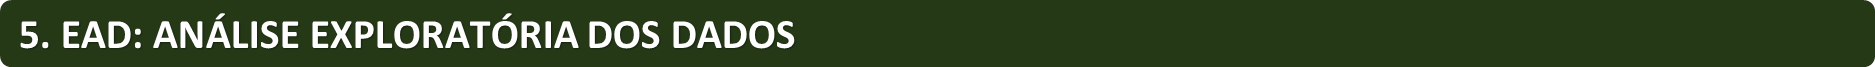

In [7]:
# Criação e visualização da coluna "Classe" de acordo com o tipo de animal para posterior plotagem no Grafo.
df['Classe'] = 'Mammal'
df.loc[df['class_type'].values == 2, 'Classe'] = 'Bird'
df.loc[df['class_type'].values == 3, 'Classe'] = 'Reptile'
df.loc[df['class_type'].values == 4, 'Classe'] = 'Fish'
df.loc[df['class_type'].values == 5, 'Classe'] = 'Amphibian'
df.loc[df['class_type'].values == 6, 'Classe'] = 'Bug'
df.loc[df['class_type'].values == 7, 'Classe'] = 'Invertebrate'

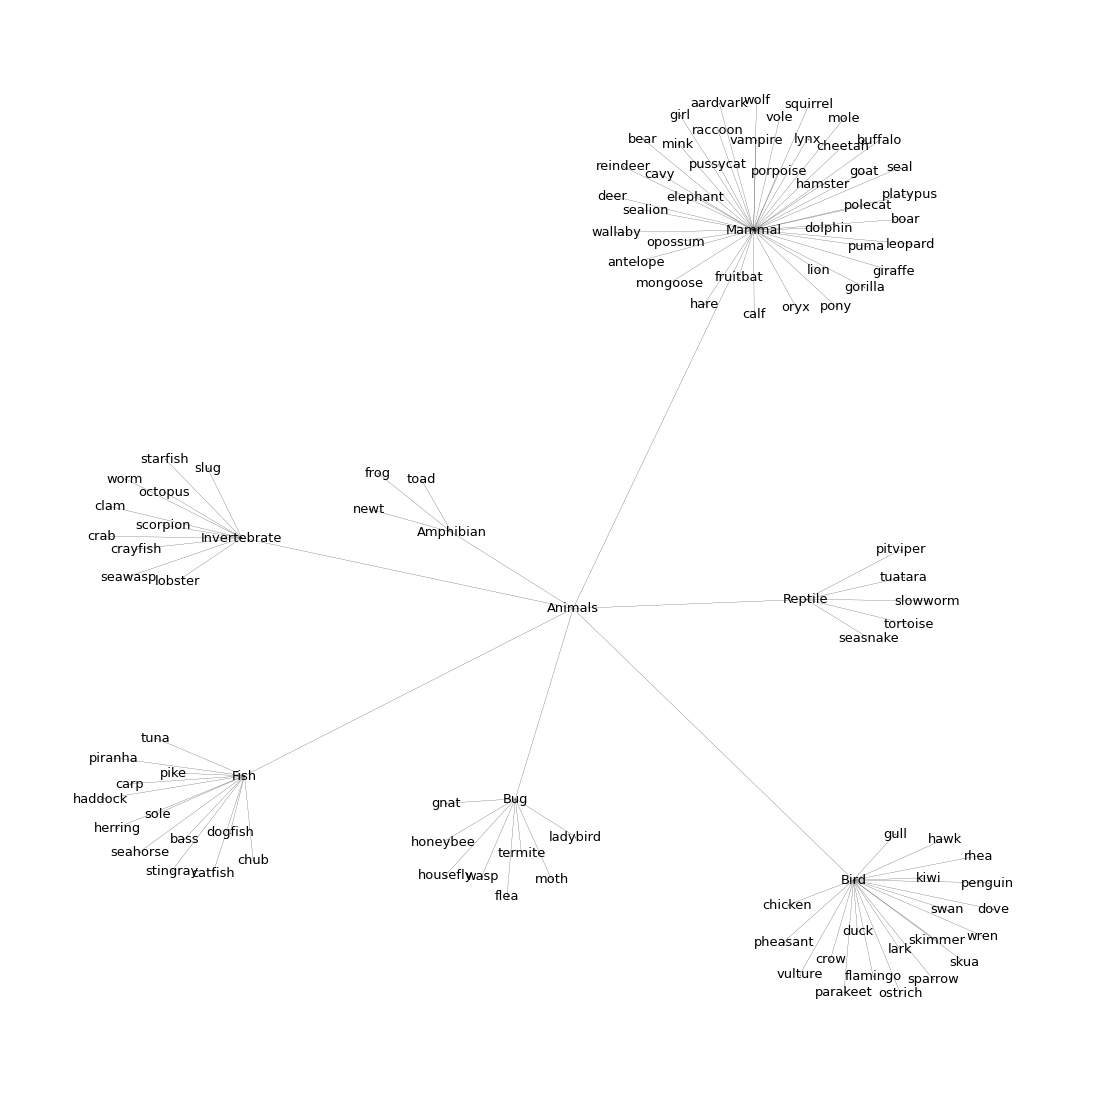

In [8]:
# Plotagem do Grafo, indicando a espécie de cada animal contido na base de dados.
categoriaAnimais = [str(x) for x in sorted(df['Classe'].unique())]
categoriaAnimaisAresta = [('Animals', x) for x in categoriaAnimais]
especies = [df['animal_name'][df['Classe'] == x].tolist() for x in sorted(df['Classe'].unique())]
especies = [j for i in especies for j in i]
especiesAresta = []

for animal in especies:
    for categoria in sorted(df['Classe'].unique()):
        if animal in df['animal_name'][df['Classe'] == categoria].tolist():
            especiesAresta.append(tuple((str(categoria), animal)))
arestaEspecies = especiesAresta + categoriaAnimaisAresta

plt.figure(figsize=(15, 15))
graph = nx.Graph()
graph.add_edges_from(arestaEspecies, color='red')

options = {'node_size': 0.25, 'width': 0.2,}
position = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, pos=position, font_size=13, **options)
plt.show()

<a name="a"></a>

In [ ]:
grupo = df.groupby(pd.Grouper(key='Classe')).size().reset_index(name='count')
fig = px.treemap(grupo, path=['Classe'], values='count')
fig.update_layout(font_family='Calibri', 
                  title_text='Quantidade de Animais por Classe',
                  title_x=0.5, 
                  title_font=dict(size=35)
                )
fig.update_traces(textinfo='label+value', textfont_size=25)
fig.show()

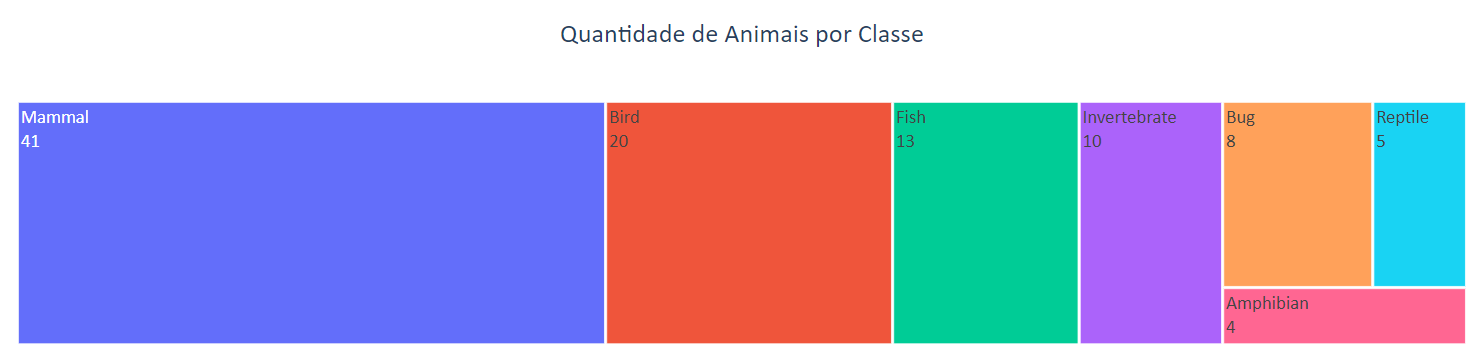

***
Podemos observar que a base esta desbalanceada, contendo muito mais animais da classe **'Mammal'**, em contra partida as classes **'Amphibian'** e **'Reptile'** são as que possuem menos amostras, respectivamente.
***

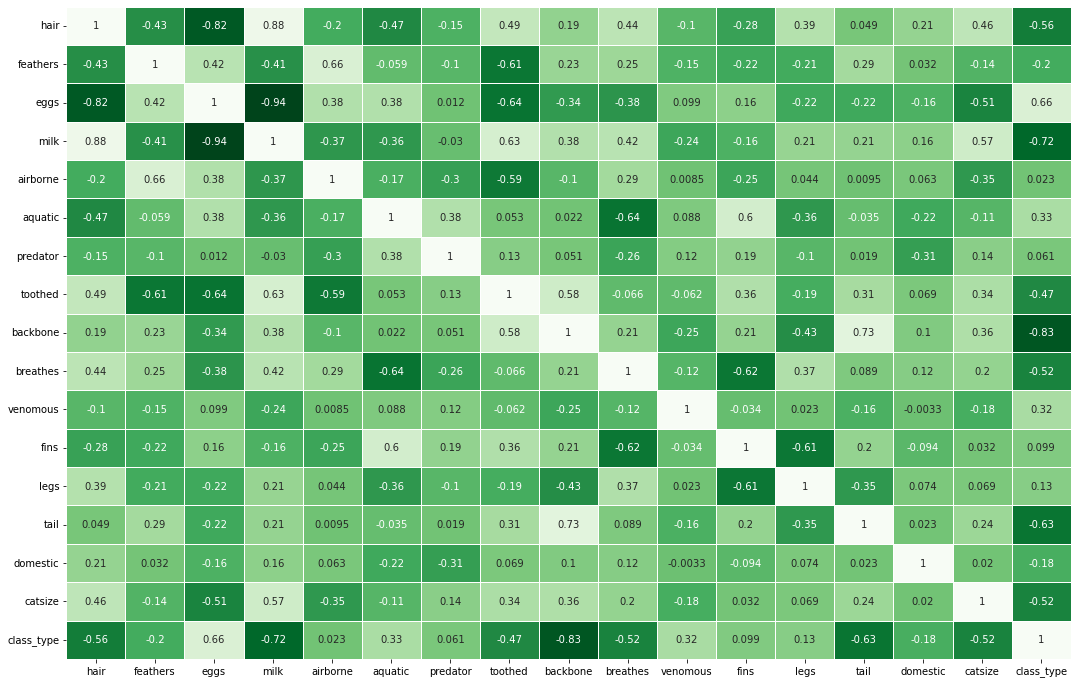

In [10]:
# Correlação entre as variáveis
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cbar=False, linewidths=0.5, cmap='Greens_r')
plt.show();

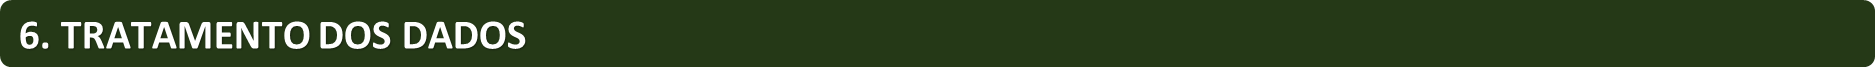

In [11]:
# Conforme analisado na Etapa 4. Visualização Básica dos Dados, vimos que o registro "frog" aparenta estar duplicado, vamos checar.
df[df['animal_name'] == 'frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Classe
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,Amphibian
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,Amphibian


***
Nota-se que as características que descrevem o animal **"frog"** diferem na coluna **"venomous"**, portanto, trata-se de animais diferentes e não excluíremos o registro da base.
***

In [12]:
# Iremos deletar do DF as colunas "animal_name" e "Classe", uma vez que não serão úteis para a aplicação dos algoritmos.
df.drop(['animal_name', 'Classe'], axis=1, inplace=True)
df.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


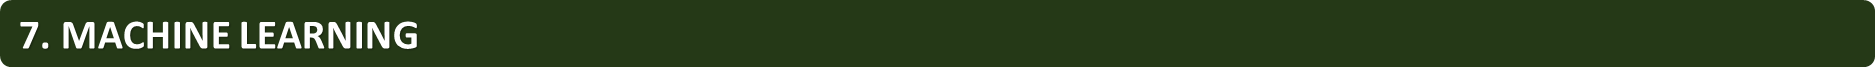

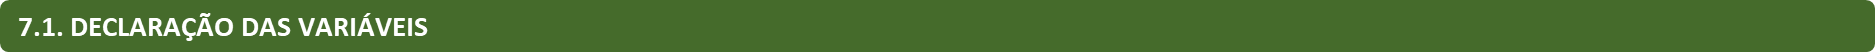

In [13]:
X = df.drop('class_type', axis=1)
y = df['class_type']

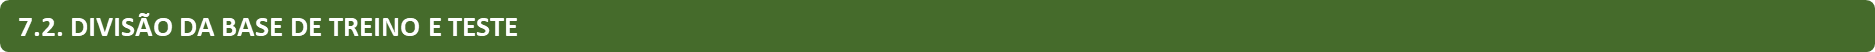

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(70, 31)

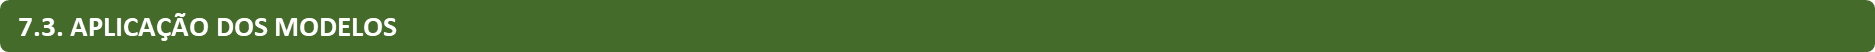

In [15]:
classificadores = []
classificadores.append(('Linear Regression', LinearRegression()))
classificadores.append(('Random Forest', RandomForestClassifier(n_estimators = 200)))
classificadores.append(('Logistic Regression', LogisticRegression()))
classificadores.append(('Support Vector Machine', SVC(C=3)))
classificadores.append(('Neural Network', MLPClassifier(hidden_layer_sizes=(64, 64))))
classificadores.append(('KNN', neighbors.KNeighborsClassifier()))
classificadores.append(('CatBoost', CatBoostClassifier(iterations=10, silent=True)))

resultados = []

for modelo, classificador in tqdm(classificadores, ncols=150):
    classificador.fit(X_train, y_train)
    score = classificador.score(X_test, y_test)
    temp = modelo, score
    resultados.append(temp)    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


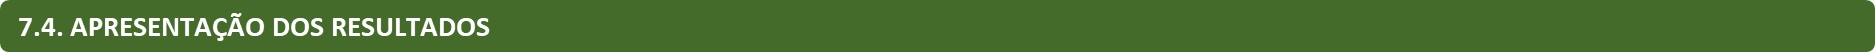

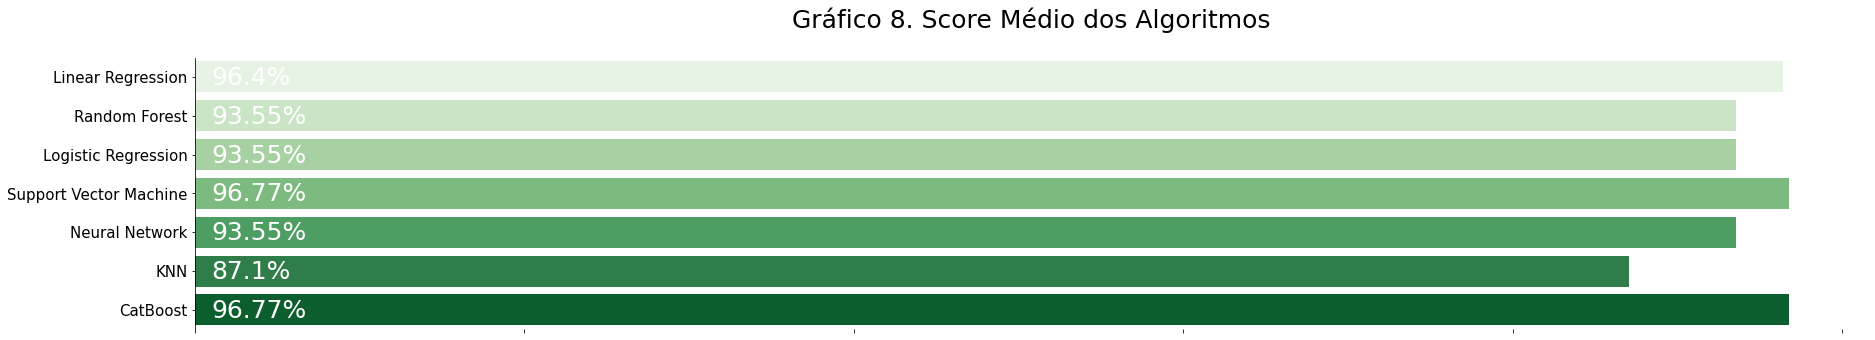

In [16]:
listaLabels = [i[0] for i in resultados]
listaResults= [i[1] for i in resultados]

fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(listaResults, listaLabels, palette='Greens')
ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(''), ax.set_ylabel(''), ax.set_title('Gráfico 8. Score Médio dos Algoritmos', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)

for i, v in enumerate(listaResults):
    plt.text(0.01, i+0.2 , s=(str(round(v*100,2)) + '%'), color='white', fontsize=25)

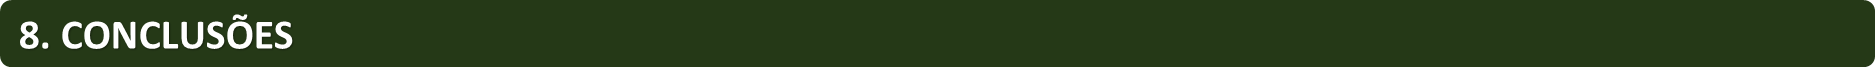

***

* O parâmetro C no algoritmo SVM, responsável por controlar a tolerância a erros foi ajustado para 3, uma vez que é o valor mínimo para se atingir o melhor resultado durante os testes nesta base de dados;


* Foram criadas camadas ocultas no algoritmo de Redes Neurais, em razão da melhoria no desempenho do algoritmo;


* Todos os algoritmos tiveram desempenho semelhante, exceto o KNN; e


* A distribuição dos animais pode ser um problema ([imagem](#a)) , uma vez que há poucas espécies de anfíbios, répteis e insetos disponíves na base, principalmente se comparadas ao total de mamíferos.

***

|                   Github                  	|                   Linkedin                   	|                    Kaggle                    	|                 Email                	|
|:-----------------------------------------:	|:--------------------------------------------:	|:--------------------------------------------:	|:------------------------------------:	|
| [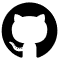](https://www.github.com/ThiagoFerreiraWD) 	| [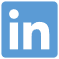](https://www.linkedin.com/in/tferreirasilva) 	| [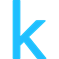](https://www.kaggle.com/thiagoferreirasilva) 	| [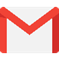](mailto:thiago.ferreirawd@gmail.com) 	|